In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

In [51]:
path = r"C:\Users\Arifin\Downloads\papaya\Combined_Leaf.csv"
df = pd.read_csv(path)
df = shuffle(df)
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
67,3,2.156127,3.455794,2.371661,3.623699,0.898994,0.837025,0.884491,0.832015,0.551475,0.516888,0.543387,0.514410,0.897164,0.834941,0.886925,0.826907,Papaya Black Spot
162,10,4.365931,6.370965,4.911275,6.028205,0.764815,0.692361,0.746193,0.703845,0.451335,0.418964,0.442486,0.423954,0.777343,0.675004,0.749468,0.692493,Papaya Ringspot
211,59,2.874923,3.655087,2.354948,3.425636,0.810160,0.776484,0.840345,0.782937,0.491415,0.474770,0.507638,0.477296,0.772577,0.711078,0.813825,0.729211,Papaya Ringspot
264,39,2.563588,3.928520,3.288664,3.930996,0.877886,0.821797,0.843872,0.818649,0.550717,0.520026,0.531096,0.518104,0.862733,0.789583,0.824200,0.789453,Powdery Mildew
18,18,0.483012,0.841461,0.600429,0.874064,0.985099,0.973304,0.979247,0.972464,0.627264,0.619364,0.623267,0.618596,0.979188,0.963845,0.974136,0.962445,Fresh Papaya Leaf


In [52]:
df.shape

(290, 18)

In [53]:
df.describe()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000
mean,30.055172,2.860222,4.144736,2.996796,4.160764,0.864185,0.812605,0.855199,0.812221,0.544492,0.519304,0.539269,0.519143,0.864204,0.803904,0.858076,0.803259
std,18.916235,1.517617,1.912257,1.488843,1.936025,0.069528,0.081898,0.066046,0.081877,0.089408,0.097038,0.090155,0.097035,0.076587,0.101239,0.078039,0.101601
min,0.000000,0.345971,0.545529,0.304810,0.539146,0.537761,0.467737,0.670416,0.461763,0.420645,0.387545,0.400065,0.384455,0.645898,0.507461,0.621925,0.487453
25%,14.000000,1.780423,2.907874,1.942383,2.874679,0.820906,0.757347,0.812508,0.757834,0.489837,0.455658,0.482308,0.454216,0.810360,0.730175,0.802923,0.730423
50%,28.500000,2.745818,4.079493,2.937561,4.063968,0.860340,0.797348,0.843777,0.795867,0.513337,0.482950,0.506922,0.483014,0.862505,0.801383,0.858441,0.794535
75%,45.000000,3.599219,5.232049,3.867119,5.237528,0.906182,0.859599,0.901021,0.863101,0.567120,0.534797,0.558805,0.536831,0.920340,0.881992,0.920400,0.880770
max,72.000000,9.822687,11.045752,9.157659,10.722630,0.986145,0.974219,0.984145,0.974791,0.816482,0.809427,0.812717,0.809060,0.986962,0.978246,0.988925,0.981042


In [54]:
df = df.rename(columns={'16': 'Class'})
X = df.drop('Class',axis=1)
y = df['Class']

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 67 to 19
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  290 non-null    int64  
 1   0           290 non-null    float64
 2   1           290 non-null    float64
 3   2           290 non-null    float64
 4   3           290 non-null    float64
 5   4           290 non-null    float64
 6   5           290 non-null    float64
 7   6           290 non-null    float64
 8   7           290 non-null    float64
 9   8           290 non-null    float64
 10  9           290 non-null    float64
 11  10          290 non-null    float64
 12  11          290 non-null    float64
 13  12          290 non-null    float64
 14  13          290 non-null    float64
 15  14          290 non-null    float64
 16  15          290 non-null    float64
 17  Class       290 non-null    object 
dtypes: float64(16), int64(1), object(1)
memory usage: 43.0+ KB


Text(0.5, 1.0, 'Correlation between different fearures')

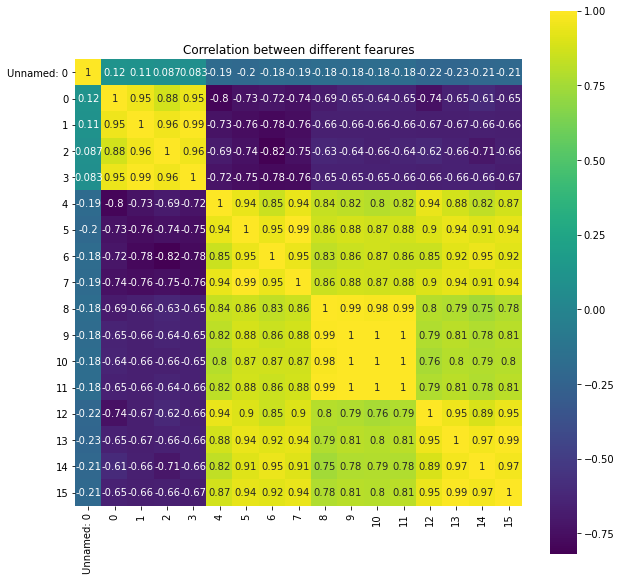

In [56]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

In [57]:
X.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
67,3,2.156127,3.455794,2.371661,3.623699,0.898994,0.837025,0.884491,0.832015,0.551475,0.516888,0.543387,0.514410,0.897164,0.834941,0.886925,0.826907
162,10,4.365931,6.370965,4.911275,6.028205,0.764815,0.692361,0.746193,0.703845,0.451335,0.418964,0.442486,0.423954,0.777343,0.675004,0.749468,0.692493
211,59,2.874923,3.655087,2.354948,3.425636,0.810160,0.776484,0.840345,0.782937,0.491415,0.474770,0.507638,0.477296,0.772577,0.711078,0.813825,0.729211
264,39,2.563588,3.928520,3.288664,3.930996,0.877886,0.821797,0.843872,0.818649,0.550717,0.520026,0.531096,0.518104,0.862733,0.789583,0.824200,0.789453
18,18,0.483012,0.841461,0.600429,0.874064,0.985099,0.973304,0.979247,0.972464,0.627264,0.619364,0.623267,0.618596,0.979188,0.963845,0.974136,0.962445


In [58]:
y.head()

67     Papaya Black Spot
162      Papaya Ringspot
211      Papaya Ringspot
264       Powdery Mildew
18     Fresh Papaya Leaf
Name: Class, dtype: object

# Feature Scaling

In [59]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,MaxAbsScaler
  
scaler = MaxAbsScaler()

X = scaler.fit_transform(X)

X = pd.DataFrame(X)

In [60]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.041667,0.219505,0.312862,0.258981,0.337949,0.911625,0.859176,0.898740,0.853532,0.675427,0.638585,0.668606,0.635813,0.909015,0.853509,0.896857,0.842887
1,0.138889,0.444474,0.576780,0.536302,0.562195,0.775560,0.710683,0.758215,0.722047,0.552780,0.517606,0.544453,0.524009,0.787612,0.690015,0.757861,0.705875
2,0.819444,0.292682,0.330904,0.257156,0.319477,0.821543,0.797032,0.853883,0.803184,0.601869,0.586551,0.624619,0.589939,0.782783,0.726891,0.822938,0.743302
3,0.541667,0.260986,0.355659,0.359116,0.366607,0.890220,0.843544,0.857467,0.839820,0.674499,0.642461,0.653483,0.640378,0.874130,0.807142,0.833430,0.804709
4,0.250000,0.049173,0.076180,0.065566,0.081516,0.998940,0.999060,0.995023,0.997613,0.768251,0.765189,0.766893,0.764586,0.992123,0.985279,0.985045,0.981043


In [61]:
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(
      X, y , test_size = 0.25, random_state=None)

X_train.shape, X_test.shape


((217, 17), (73, 17))

In [62]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
221,0.763889,0.129507,0.210286,0.203633,0.195764,0.892234,0.832619,0.854105,0.843844,0.628507,0.587212,0.604330,0.594614,0.889088,0.793439,0.829334,0.813162
110,0.791667,0.207470,0.317955,0.316001,0.298259,0.876993,0.818863,0.838778,0.830429,0.620325,0.581842,0.597160,0.589233,0.867510,0.768917,0.804581,0.789322
121,0.250000,0.434643,0.485836,0.492335,0.582519,0.833076,0.810109,0.828133,0.783629,0.607935,0.592924,0.606625,0.578193,0.810639,0.765401,0.797769,0.721246
222,0.777778,0.261153,0.357707,0.343257,0.339564,0.834742,0.778378,0.805238,0.787760,0.601838,0.568354,0.586019,0.573010,0.822957,0.726696,0.778497,0.747764
182,0.486111,0.426021,0.456958,0.371757,0.485360,0.747637,0.716939,0.785404,0.708355,0.541946,0.525484,0.564998,0.521530,0.706055,0.648518,0.761963,0.635083


# Model training

## KNN

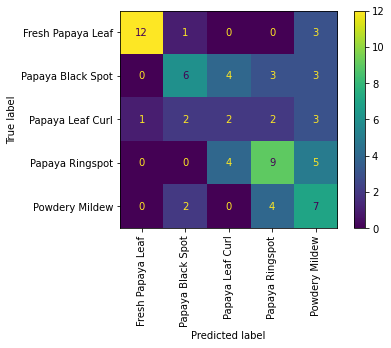

In [63]:
# Remember that we are trying to come up
# with a model to predict whether
# someone will TARGET CLASS or not.
# We'll start with k = 1.

from sklearn.neighbors import KNeighborsClassifier
  
knn = KNeighborsClassifier(n_neighbors = 1)
  
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

plot_confusion_matrix(knn, X_test, y_test)
plt.xticks(rotation = 90)
plt.show()

# Predictions and Evaluations
# Let's evaluate our KNN model ! 


In [64]:
from sklearn.metrics import classification_report  
print(classification_report(y_test, pred))


                   precision    recall  f1-score   support

Fresh Papaya Leaf       0.92      0.75      0.83        16
Papaya Black Spot       0.55      0.38      0.44        16
 Papaya Leaf Curl       0.20      0.20      0.20        10
  Papaya Ringspot       0.50      0.50      0.50        18
   Powdery Mildew       0.33      0.54      0.41        13

         accuracy                           0.49        73
        macro avg       0.50      0.47      0.48        73
     weighted avg       0.53      0.49      0.50        73



In [65]:
from sklearn import metrics
error_rate = []
scores = []

k=50
max_accuracy=0
best_k=1

for i in range(1, k):
      
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    y_predict = knn.predict(X_test)
    curr_accuracy=metrics.accuracy_score(y_test,y_predict)
    if curr_accuracy>max_accuracy:
        max_accuracy=curr_accuracy
        best_k=i
    scores.append(curr_accuracy)
  


Text(0, 0.5, 'Error Rate')

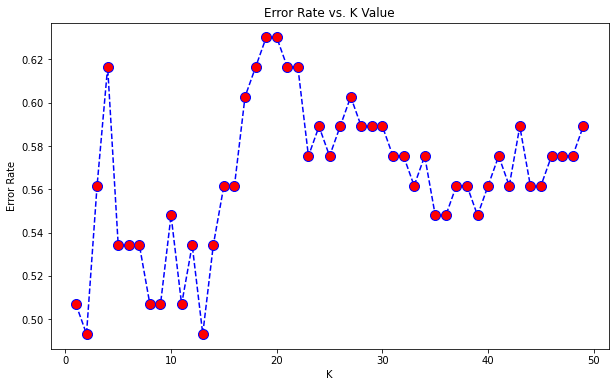

In [66]:
plt.figure(figsize =(10, 6))
plt.plot(range(1, k), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Accuracy')

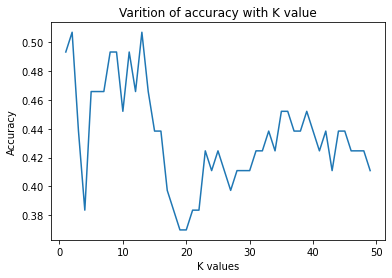

In [67]:
plt.plot(np.arange(1,k),scores)
plt.title('Varition of accuracy with K value')
plt.xlabel('K values')
plt.ylabel('Accuracy')

In [68]:
knn = KNeighborsClassifier(n_neighbors = best_k)
  
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
from sklearn.metrics import classification_report  
print(classification_report(y_test, pred))

print("Accuracy for k = {} is {}%".format(best_k,max_accuracy*100))

                   precision    recall  f1-score   support

Fresh Papaya Leaf       0.74      0.88      0.80        16
Papaya Black Spot       0.45      0.62      0.53        16
 Papaya Leaf Curl       0.50      0.40      0.44        10
  Papaya Ringspot       0.44      0.39      0.41        18
   Powdery Mildew       0.25      0.15      0.19        13

         accuracy                           0.51        73
        macro avg       0.48      0.49      0.47        73
     weighted avg       0.48      0.51      0.49        73

Accuracy for k = 2 is 50.68493150684932%


## SVM

In [69]:
from sklearn.svm import SVC
svm_model= SVC()
tuned_parameters = {
 'C': (np.arange(1,30)) , 'kernel': ['linear'],
 'C': (np.arange(1,30)) ,  'kernel': ['rbf'],
 'C':(np.arange(1,30)) , 'kernel':['poly']
                   }
from sklearn.model_selection import GridSearchCV

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

model_svm.fit(X_train,y_train)
print('best hyperlink parameters')
print(model_svm.best_params_)
y_pred= model_svm.predict(X_test)
print('Accuracy Score:')

print(classification_report(y_test, y_pred))

best hyperlink parameters
{'C': 4, 'kernel': 'poly'}
Accuracy Score:
                   precision    recall  f1-score   support

Fresh Papaya Leaf       1.00      0.81      0.90        16
Papaya Black Spot       0.84      1.00      0.91        16
 Papaya Leaf Curl       0.86      0.60      0.71        10
  Papaya Ringspot       0.59      0.56      0.57        18
   Powdery Mildew       0.47      0.62      0.53        13

         accuracy                           0.73        73
        macro avg       0.75      0.72      0.72        73
     weighted avg       0.75      0.73      0.73        73



In [70]:
print('Model accuracy score: {0:0.4f}%'. format(accuracy_score(y_pred,y_test)*100))

Model accuracy score: 72.6027%


## Naive Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB,CategoricalNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(classification_report(y_test, y_pred))



                   precision    recall  f1-score   support

Fresh Papaya Leaf       0.80      0.75      0.77        16
Papaya Black Spot       0.60      0.19      0.29        16
 Papaya Leaf Curl       0.67      0.20      0.31        10
  Papaya Ringspot       0.48      0.56      0.51        18
   Powdery Mildew       0.31      0.69      0.43        13

         accuracy                           0.49        73
        macro avg       0.57      0.48      0.46        73
     weighted avg       0.57      0.49      0.48        73



In [72]:
print('Model accuracy score: {0:0.4f}%'. format(accuracy_score(y_test, y_pred)*100))

Model accuracy score: 49.3151%


## Logistic regression

In [73]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', max_iter=1000)

# fit the model
lr.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print(classification_report(y_test, y_pred))


                   precision    recall  f1-score   support

Fresh Papaya Leaf       0.80      0.75      0.77        16
Papaya Black Spot       0.60      0.19      0.29        16
 Papaya Leaf Curl       0.67      0.20      0.31        10
  Papaya Ringspot       0.48      0.56      0.51        18
   Powdery Mildew       0.31      0.69      0.43        13

         accuracy                           0.49        73
        macro avg       0.57      0.48      0.46        73
     weighted avg       0.57      0.49      0.48        73



In [74]:
print('Model accuracy score: {0:0.4f}%'. format(accuracy_score(y_test, y_pred)*100))

Model accuracy score: 49.3151%


# K-Fold Cross Validation

In [75]:
from sklearn.model_selection import KFold, StratifiedKFold

kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1


Fold:1, Train set: 217, Test set:73
Fold:2, Train set: 217, Test set:73
Fold:3, Train set: 218, Test set:72
Fold:4, Train set: 218, Test set:72


In [76]:
score = cross_val_score(lr, X, y, cv= kf, scoring="accuracy")
print('Scores for each fold are:')
print(score)
print('Model accuracy score for Logistic Regression: {0:0.4f}%'.format(score.mean()*100))

Scores for each fold are:
[0.57534247 0.46575342 0.5        0.61111111]
Model accuracy score for Logistic Regression: 53.8052%


In [77]:
score = cross_val_score(gnb, X, y, cv= kf, scoring="accuracy")
print('Scores for each fold are:')
print(score)
print('Model accuracy score for Gaussian Naive Bayes: {0:0.4f}%'.format(score.mean()*100))

Scores for each fold are:
[0.5890411  0.53424658 0.55555556 0.5       ]
Model accuracy score for Gaussian Naive Bayes: 54.4711%
